# Heart Rate Varability (HRV)

NeuroKit2 is the most comprehensive package when it comes to HRV indices, and this example shows how to use NeuroKit2 to compute heart rate variability (HRV) indices in the time-, frequency-, and non-linear domain.

For a comprehensive review of the most up-to-date HRV indices, a discussion of their significance in psychology, and a step-by-step guide for HRV analysis using **NeuroKit2**, the [Heart Rate Variability in Psychology: A Review of HRV Indices and an Analysis Tutorial](https://doi.org/10.3390/s21123998) paper is a good place to start. 

## Compute HRV features

In [1]:
# Load the NeuroKit package
import neurokit2 as nk

In [ ]:
# Note: this cell is hidden using the "remove-input" tag
# Make bigger images
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]  
plt.rcParams['font.size']= 14

## Download Dataset

First, let's download the resting rate data (sampled at 100Hz) using `nk.data()`.

In [3]:
data = nk.data("bio_resting_5min_100hz")
data.head()  # Print first 5 rows

,ECG,PPG,RSP
0,0.003766,-0.102539,0.494652
1,-0.017466,-0.103760,0.502483
2,-0.015679,-0.107422,0.511102
3,-0.001598,-0.110855,0.518791
4,0.002483,-0.112610,0.528669


You can see that it consists of three different signals, pertaining to ECG, PPG (an alternative determinant of heart rate as compared to ECG), and RSP (respiration). Now, let's extract the ECG signal in the shape of a vector (i.e., a one-dimensional array), and find the peaks using [ecg_peaks()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-peaks).

In [4]:
# Find peaks
peaks, info = nk.ecg_peaks(data["ECG"], sampling_rate=100)

*Note: It is critical that you specify the correct sampling rate of your signal throughout many processing functions, as this allows NeuroKit to have a time reference.*

This produces two elements, `peaks` which is a DataFrame of same length as the input signal in which occurences of R-peaks are marked with 1 in a list of zeros. `info` is a dictionary of the sample points at which these R-peaks occur. 

HRV is the temporal variation between consecutive heartbeats (**RR intervals**). Here, we will use `peaks` i.e. occurrences of the heartbeat peaks, as the input argument in the following HRV functions to extract the indices. 

## Time-Domain Analysis

First, let's extract the time-domain indices.

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_HTI,HRV_TINN
0,696.395349,62.135891,10.060728,60.275036,NaN,NaN,NaN,NaN,69.697983,69.779109,0.089225,0.100084,690.0,44.478,0.064461,60.0,14.651163,49.302326,7.962963,234.375


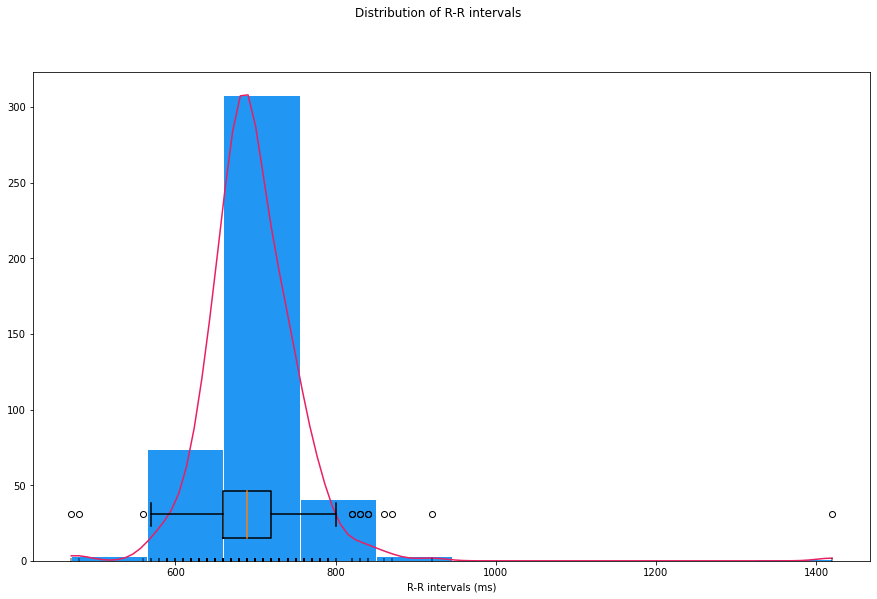

In [5]:
# Extract clean EDA and SCR features
hrv_time = nk.hrv_time(peaks, sampling_rate=100, show=True)
hrv_time

These features include the RMSSD (square root of the mean of the sum of successive differences between adjacent RR intervals), MeanNN (mean of RR intervals) so on and so forth. You can also visualize the distribution of R-R intervals by specifying `show=True` in [hrv_time()](https://neuropsychology.github.io/NeuroKit/functions/hrv.html#hrv-time).

## Frequency-Domain Analysis

Now, let's extract the frequency domain features, which involve extracting for example the spectral power density pertaining to different frequency bands. Again, you can visualize the power across frequency bands by specifying `show=True` in [hrv_frequency()](https://neuropsychology.github.io/NeuroKit/functions/hrv.html#hrv-frequency).

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,0.016913,0.050186,0.06632,0.009835,0.75672,0.350328,0.462957,-2.713264


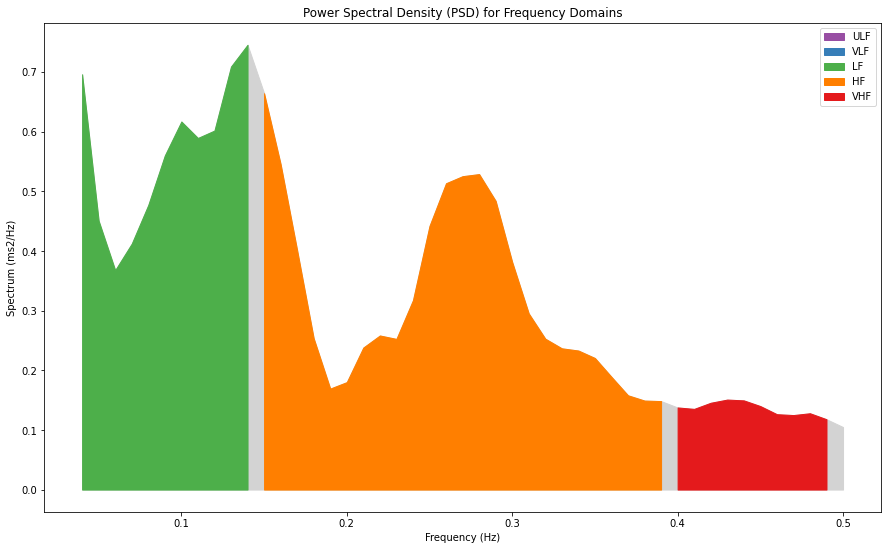

In [9]:
hrv_freq = nk.hrv_frequency(peaks, sampling_rate=100, show=True, normalize=True)
hrv_freq

## Non-Linear Domain Analysis

Now, let's compute the non-linear indices with [hrv_nonlinear()](https://neuropsychology.github.io/NeuroKit/functions/hrv.html#hrv-nonlinear).

,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,49.341281,72.597435,0.679656,11253.343336,1.471333,4.758252,427.259889,0.55814,0.511688,0.736041,...,1.259931,4.282683,1.063533,1.166172,1.331672,1.387204,0.712083,1.921677,1.913071,0.854475


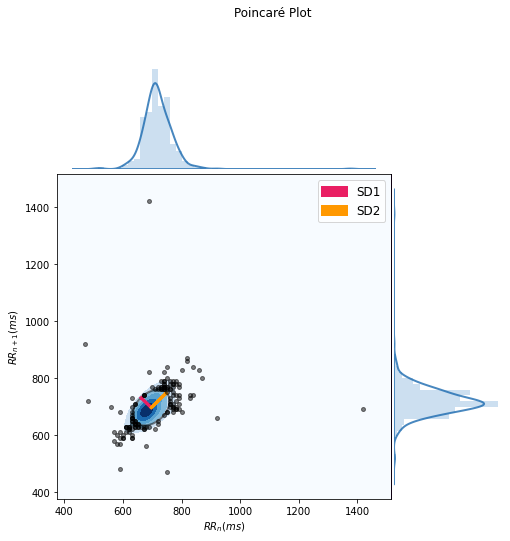

In [7]:
hrv_nonlinear = nk.hrv_nonlinear(peaks, sampling_rate=100, show=True)
hrv_nonlinear

This will produce a Poincaré plot which plots each RR interval against the next successive one.

Note that there exist many more [**complexity indices**](https://neuropsychology.github.io/NeuroKit/functions/complexity.html), that are available in NeuroKit2, and that could be applied to HRV. The ``hrv_nonlinear()`` function only includes the most commonly used indices.

## All Domains

Finally, if you'd like to extract HRV indices from all three domains, you can simply input `peaks` into [hrv()](https://neuropsychology.github.io/NeuroKit/functions/hrv.html), where you can specify `show=True` to visualize the combination of plots depicting the RR intervals distribution, power spectral density for frequency domains, and the poincare scattergram.

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,696.395349,62.135891,10.060728,60.275036,NaN,NaN,NaN,NaN,69.697983,69.779109,...,1.259931,4.282683,1.063533,1.166172,1.331672,1.387204,0.712083,1.921677,1.913071,0.854475


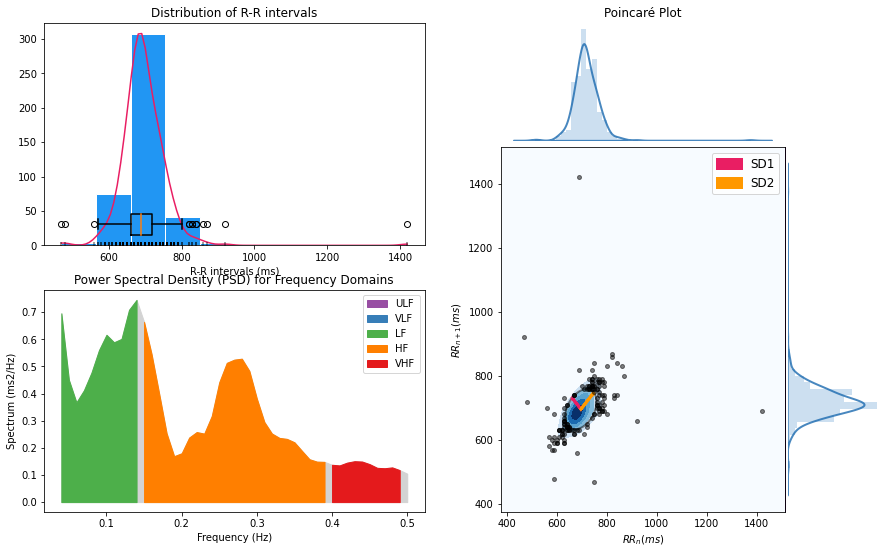

In [8]:
hrv_indices = nk.hrv(peaks, sampling_rate=100, show=True)
hrv_indices